In [43]:
import pandas as pd

In [44]:
time_series = pd.read_excel('timeseries.xlsx', sheet_name = 'Sheet1')

In [45]:
time_series.columns

Index(['Unnamed: 0', 'week', 'month', 'year', 'date', 'total_revenue'], dtype='object')

In [46]:
time_series = time_series[['date', 'total_revenue']]
time_series['date'] = pd.to_datetime(time_series['date'])

In [47]:
time_series = time_series.set_index('date')

In [48]:
time_series

,total_revenue
date,
2009-12-01,232177.51
2009-12-07,207908.73
2009-12-14,207685.87
2009-12-21,35731.90
2010-01-04,167636.95
...,...
2011-11-14,276216.98
2011-11-21,248234.58
2011-11-28,141669.57


In [49]:
monthly_series = time_series['total_revenue'].resample('M').sum()

In [50]:
monthly_series

date
2009-12-31     683504.010
2010-01-31     555802.672
2010-02-28     504558.956
2010-03-31     696978.471
2010-04-30     591982.002
2010-05-31     597833.380
2010-06-30     636371.130
2010-07-31     589736.170
2010-08-31     602224.600
2010-09-30     829013.951
2010-10-31    1033112.010
2010-11-30    1166460.022
2010-12-31     570422.730
2011-01-31     568101.310
2011-02-28     446084.920
2011-03-31     594081.760
2011-04-30     468374.331
2011-05-31     677355.150
2011-06-30     660046.050
2011-07-31     598962.901
2011-08-31     644051.040
2011-09-30     950690.202
2011-10-31    1035642.450
2011-11-30    1156205.610
2011-12-31     517208.440
Freq: M, Name: total_revenue, dtype: float64

<Axes: xlabel='date'>

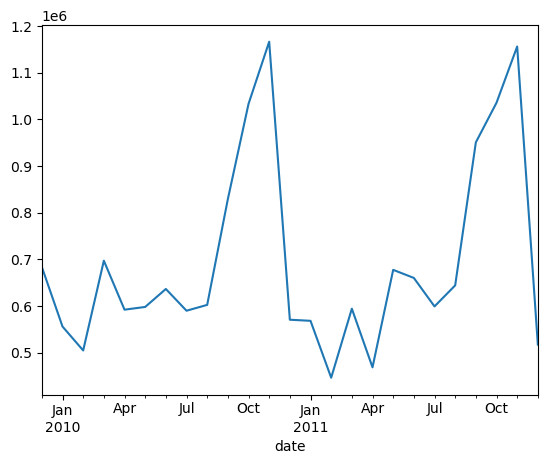

In [51]:
monthly_series.plot()

In [52]:
import statsmodels.api as sm
import warnings
import itertools

In [53]:
components = sm.tsa.seasonal_decompose(x = monthly_series)

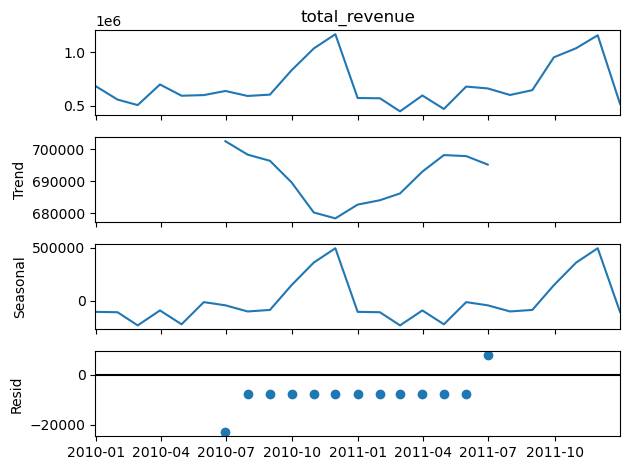

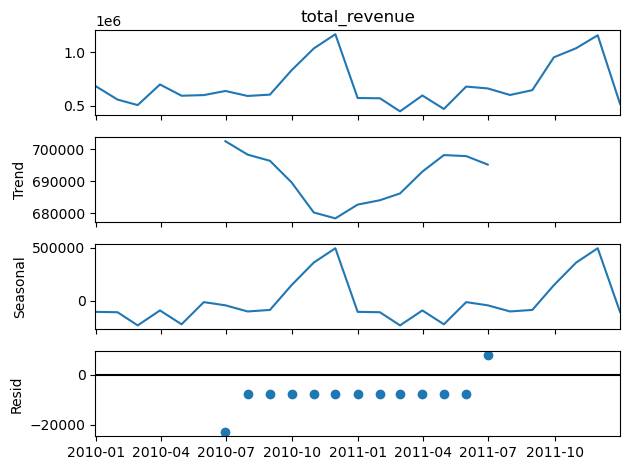

In [54]:
components.plot()

In [55]:
trend = components.trend
trend

date
2009-12-31              NaN
2010-01-31              NaN
2010-02-28              NaN
2010-03-31              NaN
2010-04-30              NaN
2010-05-31              NaN
2010-06-30    702586.394500
2010-07-31    698387.117750
2010-08-31    696463.142833
2010-09-30    689739.361708
2010-10-31    680301.679125
2010-11-30    678464.766583
2010-12-31    682764.628667
2011-01-31    684135.530792
2011-02-28    686262.746250
2011-03-31    693075.358375
2011-04-30    698250.637167
2011-05-31    697928.805000
2011-06-30    695284.275750
2011-07-31              NaN
2011-08-31              NaN
2011-09-30              NaN
2011-10-31              NaN
2011-11-30              NaN
2011-12-31              NaN
Freq: M, Name: trend, dtype: float64

In [56]:
seasonality = components.seasonal
seasonality

date
2009-12-31   -104714.101552
2010-01-31   -108406.423677
2010-02-28   -232550.029135
2010-03-31    -91365.801260
2010-04-30   -222248.509052
2010-05-31    -12945.857885
2010-06-30    -43098.948010
2010-07-31   -101023.150635
2010-08-31    -86610.745719
2010-09-30    146902.386406
2010-10-31    360438.127990
2010-11-30    495623.052531
2010-12-31   -104714.101552
2011-01-31   -108406.423677
2011-02-28   -232550.029135
2011-03-31    -91365.801260
2011-04-30   -222248.509052
2011-05-31    -12945.857885
2011-06-30    -43098.948010
2011-07-31   -101023.150635
2011-08-31    -86610.745719
2011-09-30    146902.386406
2011-10-31    360438.127990
2011-11-30    495623.052531
2011-12-31   -104714.101552
Freq: M, Name: seasonal, dtype: float64

In [57]:
remainder = components.resid
remainder

date
2009-12-31             NaN
2010-01-31             NaN
2010-02-28             NaN
2010-03-31             NaN
2010-04-30             NaN
2010-05-31             NaN
2010-06-30   -23116.316490
2010-07-31    -7627.797115
2010-08-31    -7627.797115
2010-09-30    -7627.797115
2010-10-31    -7627.797115
2010-11-30    -7627.797115
2010-12-31    -7627.797115
2011-01-31    -7627.797115
2011-02-28    -7627.797115
2011-03-31    -7627.797115
2011-04-30    -7627.797115
2011-05-31    -7627.797115
2011-06-30     7860.722260
2011-07-31             NaN
2011-08-31             NaN
2011-09-30             NaN
2011-10-31             NaN
2011-11-30             NaN
2011-12-31             NaN
Freq: M, Name: resid, dtype: float64

<Axes: xlabel='date'>

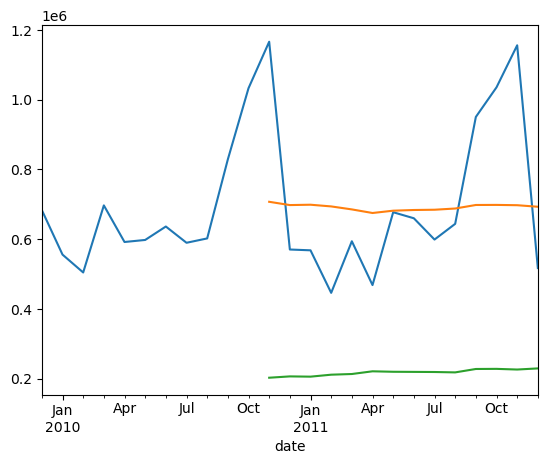

In [58]:
## check for stationarity

monthly_series.plot()
monthly_series.rolling(window = 12).mean().plot()
monthly_series.rolling(window = 12).std().plot()

In [59]:
ad_fuller_test = sm.tsa.stattools.adfuller(monthly_series, autolag = 'AIC')
ad_fuller_test

(-3.3721713790279932,
 0.011944929477576152,
 9,
 15,
 {'1%': -3.9644434814814815,
  '5%': -3.0849081481481484,
  '10%': -2.6818144444444445},
 396.284721220043)

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

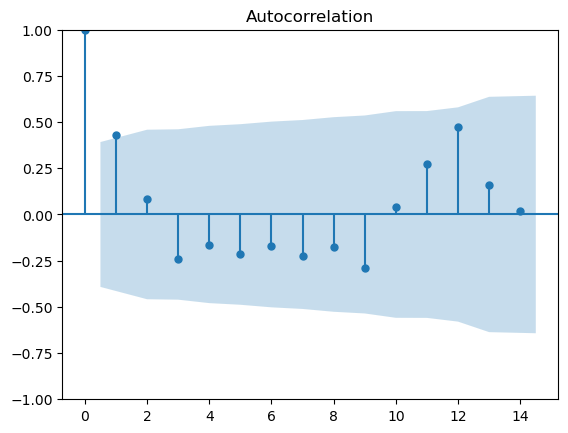

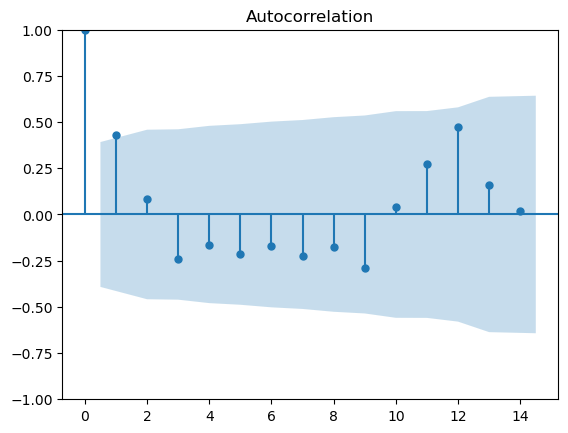

In [61]:
plot_acf(monthly_series)

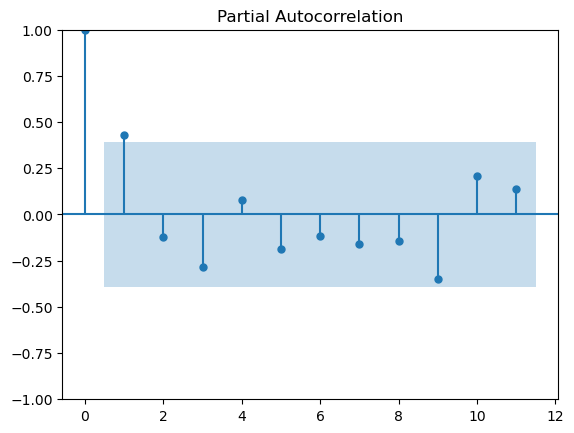

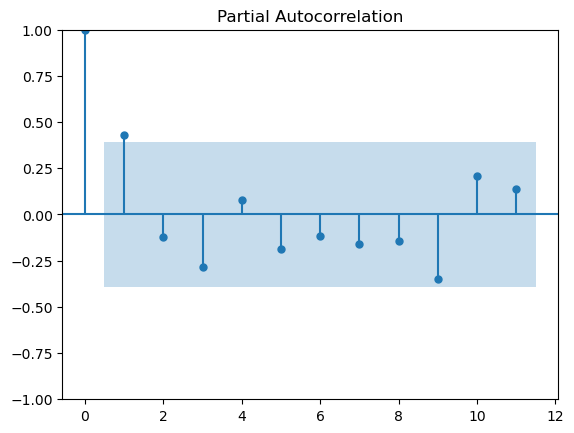

In [62]:
plot_pacf(monthly_series, lags = 11)

In [63]:
model_ma = sm.tsa.statespace.SARIMAX(monthly_series, order = (0,0,1))

In [64]:
results_ma = model_ma.fit()

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [65]:
results_ma.aic

733.1360614819736

In [66]:
model_ar = sm.tsa.statespace.SARIMAX(monthly_series, order = (1,0,0))
results_ra = model_ar.fit()
results_ra.aic

691.563420855115

In [67]:
model_arma = sm.tsa.statespace.SARIMAX(monthly_series, order = (1,0,1))
results_arma = model_arma.fit()
results_arma.aic

693.3936087977974

In [68]:
model_arima = sm.tsa.statespace.SARIMAX(monthly_series, order = (1,1,1))
results_arima = model_arima.fit()
results_arima.aic

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


661.8762133511125

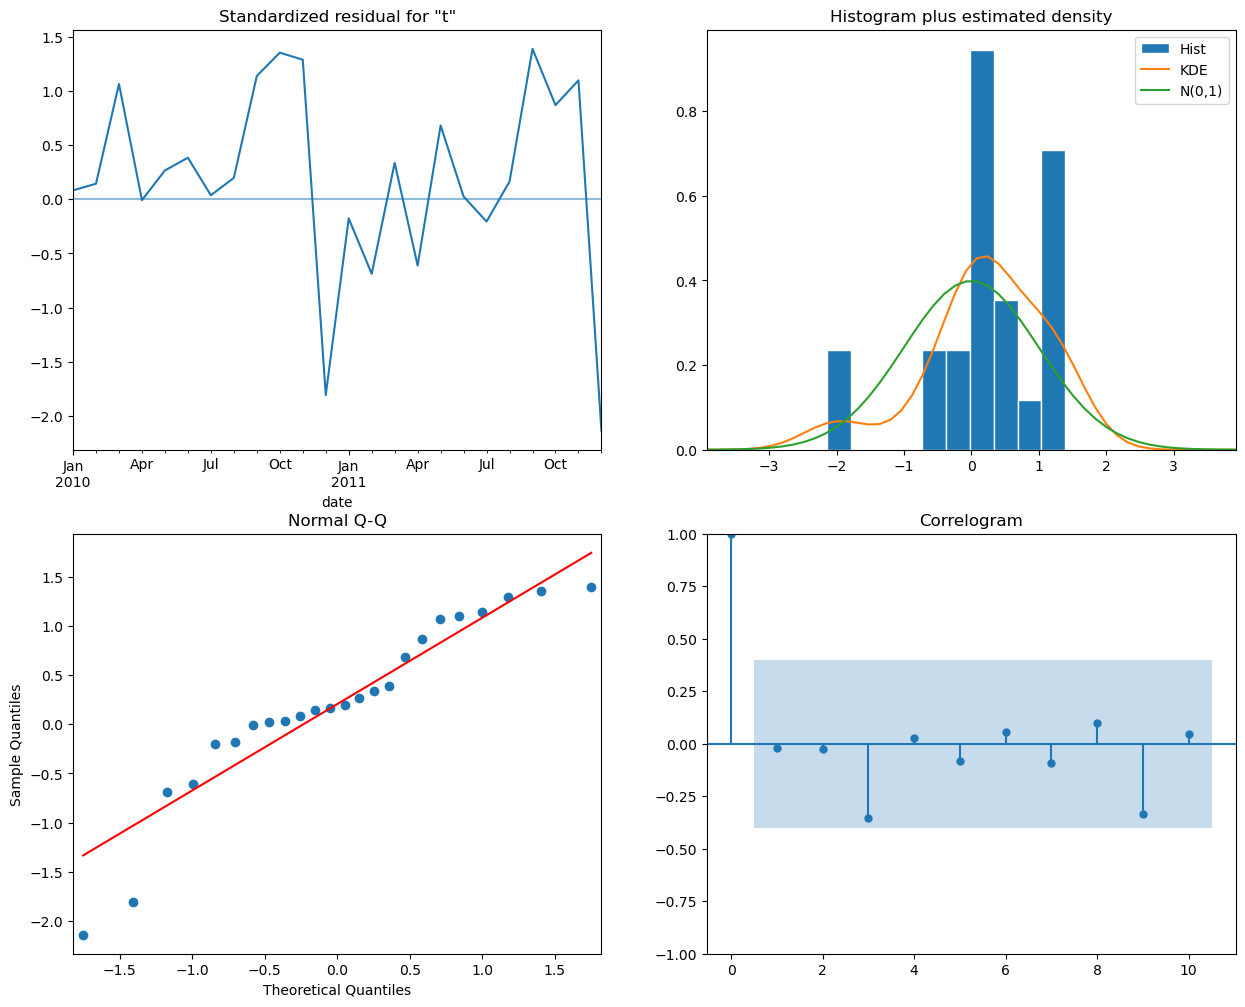

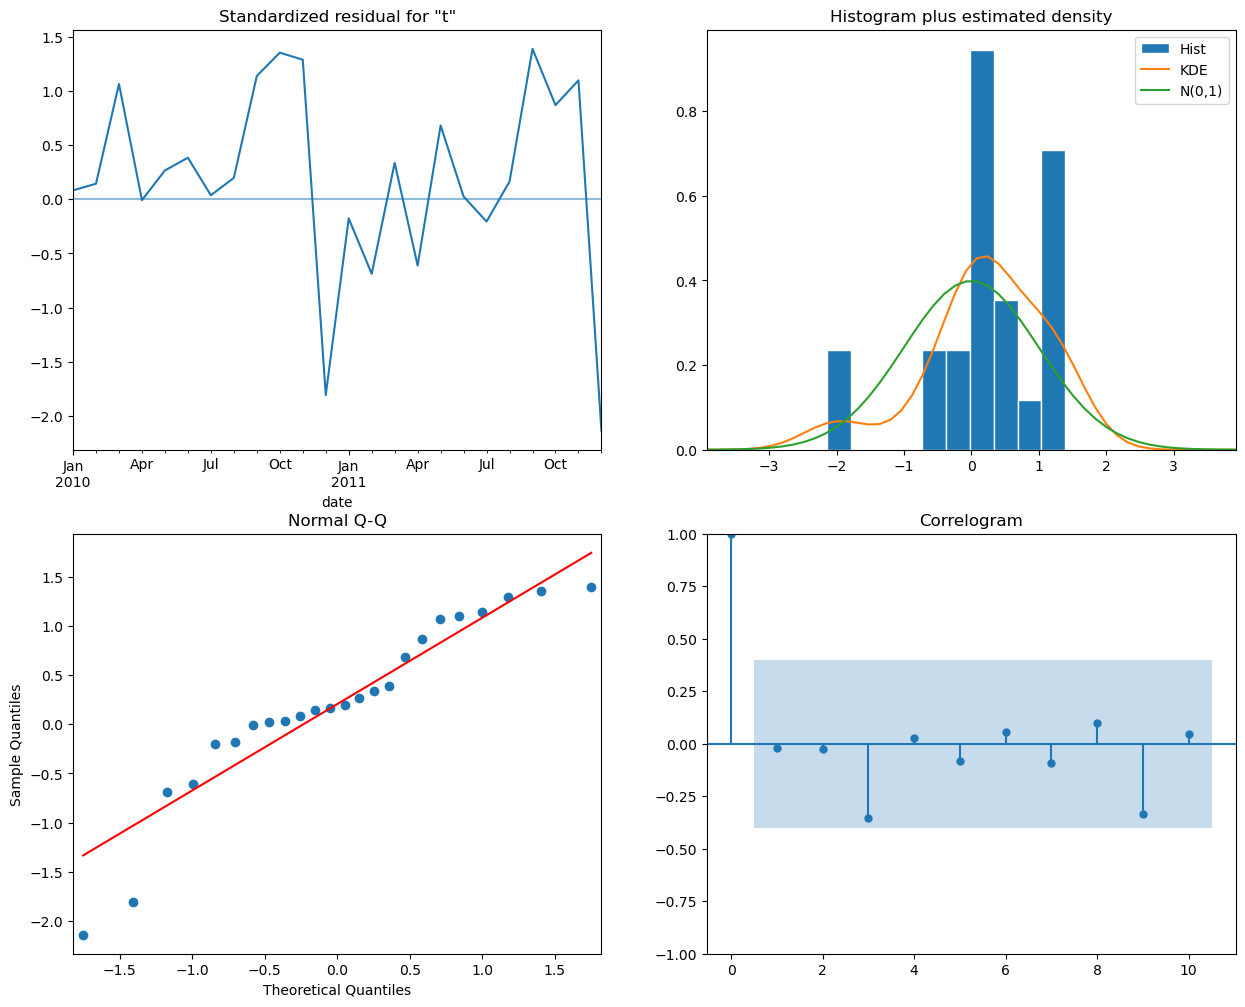

In [69]:
results_arima.plot_diagnostics(figsize = (15, 12))

In [70]:
import itertools
import warnings

In [71]:
P = D = Q = p = d = q = range(0, 3)
S = 12    
           
combinations = list(itertools.product(p, d, q, P, D, Q))
arima_orders = [(x[0], x[1], x[2]) for x in combinations]
seasonal_orders = [(x[3], x[4], x[5], S) for x in combinations]

results_data = pd.DataFrame(columns = ['p', 'd', 'q', 'P', 'D', 'Q', 'AIC'])


In [72]:
for i in range(len(combinations)):
     try:
      
          model = sm.tsa.statespace.SARIMAX(monthly_series,order = arima_orders[i],
                                        seasonal_order = seasonal_orders[i]
                                       )
          result= model.fit()
          results_data.loc[i,'p']= arima_orders[i][0]
          results_data.loc[i,'d']= arima_orders[i][1]
          results_data.loc[i,'q']= arima_orders[i][2]
          results_data.loc[i,'P']= seasonal_orders[i][0]
          results_data.loc[i,'D']= seasonal_orders[i][1]
          results_data.loc[i,'Q']= seasonal_orders[i][2]
          results_data.loc[i,'AIC']= result.aic
     except:
          continue
    

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observation

In [73]:
results_data[results_data.AIC == min(results_data.AIC)]

,p,d,q,P,D,Q,AIC
87,0,1,0,0,2,0,2.0
168,0,2,0,0,2,0,2.0


In [74]:
best_model = sm.tsa.statespace.SARIMAX(monthly_series, order = (0, 1, 0), seasonal_order = (0, 2, 0, 12))

In [75]:
results = best_model.fit()

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


In [76]:
fitting = results.get_prediction(start = '2009-12-31')

In [77]:
import matplotlib.pyplot as plt

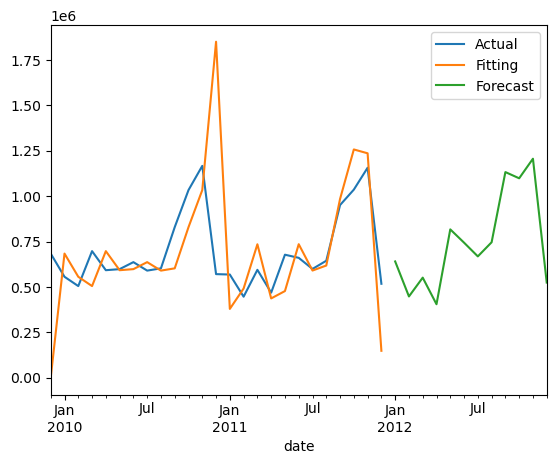

In [78]:
fitting_mean = fitting.predicted_mean
forecast = results.get_forecast(steps = 12)
forecast_mean = forecast.predicted_mean

monthly_series.plot(label = 'Actual')
fitting_mean.plot(label = 'Fitting')
forecast_mean.plot(label = 'Forecast')
plt.legend()

In [79]:
mean_absolute_error = abs(monthly_series-fitting_mean).mean()
mean_absolute_error

181106.9731200001

In [80]:
model_ARIMA = sm.tsa.statespace.SARIMAX(monthly_series, order = (1, 1, 1))
result_ARIMA = model_ARIMA.fit()
result_ARIMA.aic

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


661.8762133511125

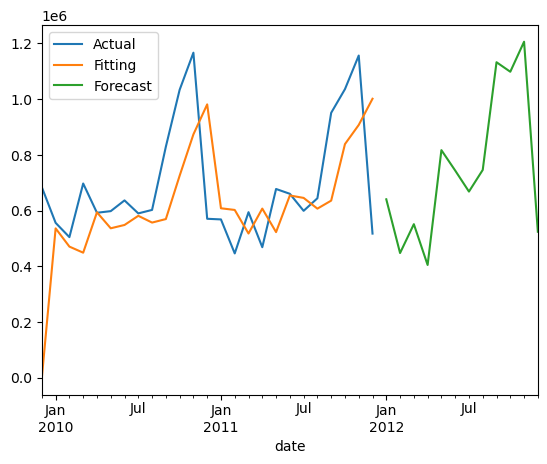

In [81]:
fitting_ARIMA = result_ARIMA.get_prediction(start = '2009-12-31')
fitting_ARIMA_mean = fitting_ARIMA.predicted_mean
forecast_ARIMA = result_ARIMA.get_forecast(steps = 12)
forecast_ARIMA_mean = forecast.predicted_mean

monthly_series.plot(label = 'Actual')
fitting_ARIMA_mean.plot(label = 'Fitting')
forecast_ARIMA_mean.plot(label = 'Forecast')
plt.legend()

In [82]:
mae_ARIMA = abs(monthly_series - fitting_ARIMA_mean).mean()
mae_ARIMA

174549.1003767776

In [83]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [84]:
model_expo1 = ExponentialSmoothing(monthly_series, trend = 'add', seasonal = 'add', seasonal_periods = 12)
model_expo2 = ExponentialSmoothing(monthly_series, trend = 'add', seasonal = 'mul', seasonal_periods = 12)
model_expo3 = ExponentialSmoothing(monthly_series, trend = 'mul', seasonal = 'add', seasonal_periods = 12)
model_expo4 = ExponentialSmoothing(monthly_series, trend = 'mul', seasonal = 'mul', seasonal_periods = 12)

In [85]:
resuls_1 = model_expo1.fit()
resuls_2 = model_expo2.fit()
resuls_3 = model_expo3.fit()
resuls_4 = model_expo4.fit()

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [86]:
resuls_1.summary()

Dep. Variable:,total_revenue,No. Observations:,25
Model:,ExponentialSmoothing,SSE,66441878558.276
Optimized:,True,AIC,574.518
Trend:,Additive,BIC,594.020
Seasonal:,Additive,AICC,688.518
Seasonal Periods:,12,Date:,"Sun, 05 Jan 2025"
Box-Cox:,False,Time:,16:27:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0403571,beta,True


In [87]:
resuls_2.summary()

Dep. Variable:,total_revenue,No. Observations:,25
Model:,ExponentialSmoothing,SSE,422177868754551.125
Optimized:,True,AIC,793.439
Trend:,Additive,BIC,812.941
Seasonal:,Multiplicative,AICC,907.439
Seasonal Periods:,12,Date:,"Sun, 05 Jan 2025"
Box-Cox:,False,Time:,16:27:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0080714,beta,True


In [88]:
resuls_3.summary()

Dep. Variable:,total_revenue,No. Observations:,25
Model:,ExponentialSmoothing,SSE,66382442329.791
Optimized:,True,AIC,574.496
Trend:,Multiplicative,BIC,593.998
Seasonal:,Additive,AICC,688.496
Seasonal Periods:,12,Date:,"Sun, 05 Jan 2025"
Box-Cox:,False,Time:,16:27:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0403571,beta,True


In [89]:
resuls_4.summary()

Dep. Variable:,total_revenue,No. Observations:,25
Model:,ExponentialSmoothing,SSE,70238748185.242
Optimized:,True,AIC,575.907
Trend:,Multiplicative,BIC,595.409
Seasonal:,Multiplicative,AICC,689.907
Seasonal Periods:,12,Date:,"Sun, 05 Jan 2025"
Box-Cox:,False,Time:,16:27:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0080714,beta,True


In [90]:
fit_1 = model_expo1.fit().predict(0, len(monthly_series))
fit_2 = model_expo2.fit().predict(0, len(monthly_series))
fit_3 = model_expo3.fit().predict(0, len(monthly_series))
fit_4 = model_expo4.fit().predict(0, len(monthly_series))

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [91]:
mae1 = abs(monthly_series - fit_1).mean()
mae2 = abs(monthly_series - fit_2).mean()
mae3 = abs(monthly_series - fit_3).mean()
mae4 = abs(monthly_series - fit_4).mean()

In [92]:
mae1

36216.80487215918

In [93]:
mae2

2730333.661587535

In [94]:
mae3

36207.94643409891

In [95]:
mae4

37960.96106850218

In [96]:
forecast = model_expo4.fit().predict(0, len(monthly_series)+12)

C:\Users\thanh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


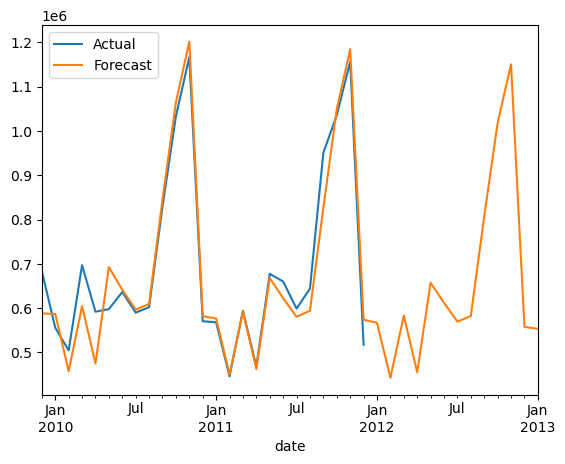

In [97]:
monthly_series.plot(label = 'Actual')
forecast.plot(label = 'Forecast')
plt.legend()